In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
data = pd.read_csv (r"C:\Users\Krishna Kousik\OneDrive\Desktop\sem5\ML\loan_data_1.csv")

In [114]:
spread_y = class_y['LoanAmount'].std()
spread_n = class_n['LoanAmount'].std()
interclass_distance = np.linalg.norm(centroid_y - centroid_n)
print(f'Centroid of Class Y: {centroid_y}')
print(f'Spread of Class Y: {spread_y}')
print(f'Centroid of Class N: {centroid_n}')
print(f'Spread of Class N: {spread_n}')
print(f'Interclass Distance: {interclass_distance}')

Centroid of Class Y: 105.76515151515152
Spread of Class Y: 28.84160488947398
Centroid of Class N: 102.85321100917432
Spread of Class N: 27.62306661177206
Interclass Distance: 2.9119405059771992


In [115]:
centroids = [centroid_y, centroid_n]
spreads = [spread_y, spread_n]
labels = ['Class Y', 'Class N']

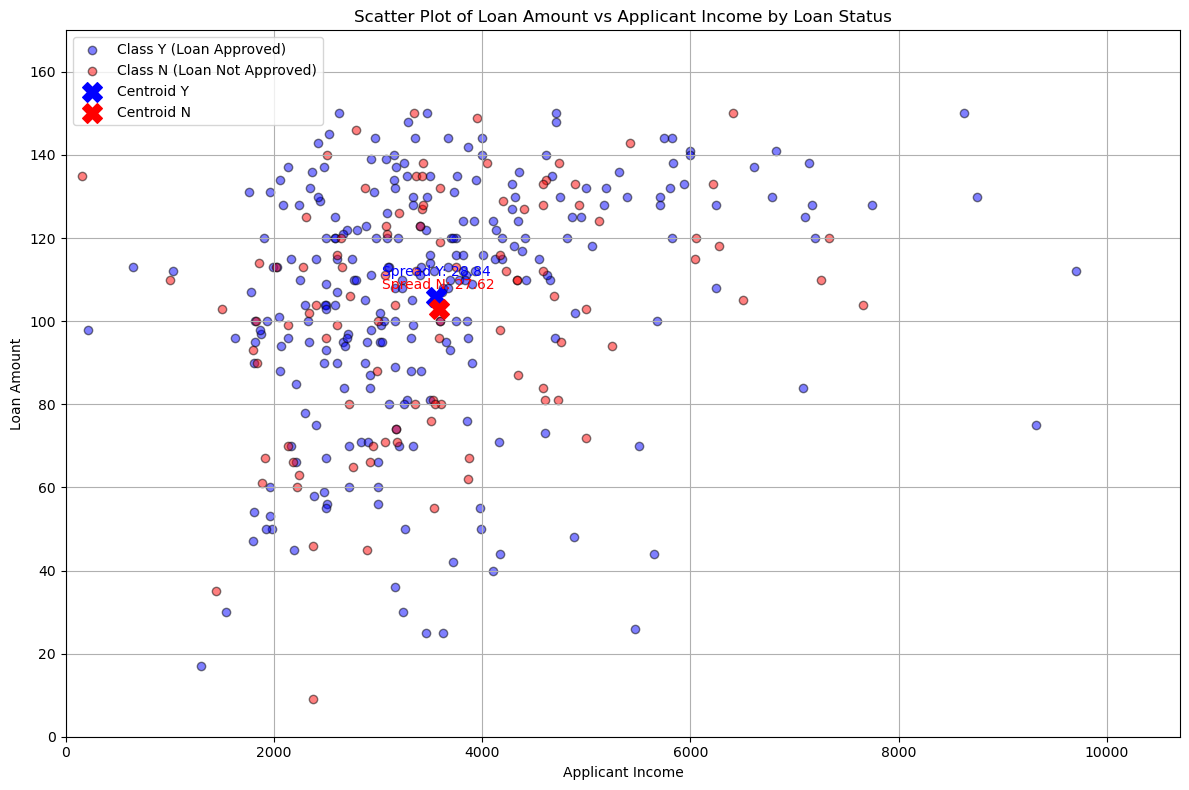

In [116]:
plt.figure(figsize=(12, 8))

# Scatter plot for Class Y
plt.scatter(class_y['ApplicantIncome'], class_y['LoanAmount'], 
            alpha=0.5, label='Class Y (Loan Approved)', color='blue', edgecolor='black')

# Scatter plot for Class N
plt.scatter(class_n['ApplicantIncome'], class_n['LoanAmount'], 
            alpha=0.5, label='Class N (Loan Not Approved)', color='red', edgecolor='black')

# Annotate centroids
plt.scatter([class_y['ApplicantIncome'].mean()], [centroid_y], color='blue', marker='X', s=200, label='Centroid Y')
plt.scatter([class_n['ApplicantIncome'].mean()], [centroid_n], color='red', marker='X', s=200, label='Centroid N')

# Add text for spreads
plt.text(class_y['ApplicantIncome'].mean(), centroid_y + 5, f'Spread Y: {spread_y:.2f}', 
         color='blue', fontsize=10, ha='center')
plt.text(class_n['ApplicantIncome'].mean(), centroid_n + 5, f'Spread N: {spread_n:.2f}', 
         color='red', fontsize=10, ha='center')

# Add titles and labels
plt.title('Scatter Plot of Loan Amount vs Applicant Income by Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(loc='upper left')

# Adjust axes limits to separate classes
plt.xlim(0, max(data['ApplicantIncome']) + 1000)
plt.ylim(0, max(data['LoanAmount']) + 20)

plt.grid()
plt.tight_layout()
plt.show()

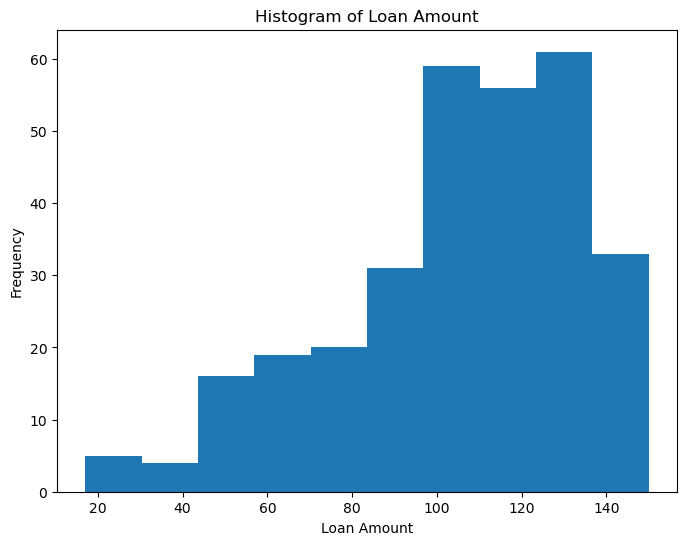

In [117]:
loan_amounts = trainset['LoanAmount']
plt.figure(figsize=(8, 6))
plt.hist(loan_amounts, bins=10)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Amount')
plt.show()

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f'Train set shape: {trainset.shape}')
print(f'Test set shape: {testset.shape}')

Train set shape: (304, 14)
Test set shape: (77, 14)


In [119]:
import numpy as np

mean_loan_amount = np.mean(loan_amounts)
variance_loan_amount = np.var(loan_amounts)

print(f'Mean Loan Amount: {mean_loan_amount:.2f}')
print(f'Variance of Loan Amount: {variance_loan_amount:.2f}')

Mean Loan Amount: 105.29
Variance of Loan Amount: 815.22


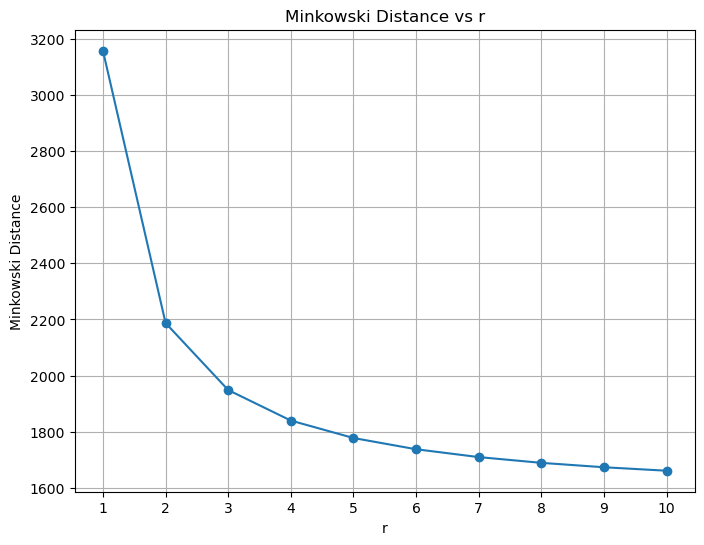

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\Krishna Kousik\OneDrive\Desktop\sem5\ML\loan_data_1.csv")


# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Select two feature vectors (e.g., first and second rows) and ensure they are numeric
feature_vector_1 = data.iloc[0].drop('Loan_Status_Y')  # Adjust based on your target column
feature_vector_2 = data.iloc[1].drop('Loan_Status_Y')

# Ensure the feature vectors are numeric
feature_vector_1 = feature_vector_1.astype(float)
feature_vector_2 = feature_vector_2.astype(float)

# Calculate Minkowski distance for r values from 1 to 10
distances = []
r_values = range(1, 11)

for r in r_values:
    distance = np.sum(np.abs(feature_vector_1 - feature_vector_2) ** r) ** (1/r)
    distances.append(distance)

# Plot the Minkowski distance vs r
plt.figure(figsize=(8, 6))
plt.plot(r_values, distances, marker='o')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs r')
plt.grid()
plt.xticks(r_values)
plt.show()

In [128]:
# Checking for missing values in columns 'LoanAmount' and 'ApplicantIncome'
print(data[['LoanAmount', 'ApplicantIncome', 'Loan_Status']].isnull().sum())
# Prepare feature matrix X and target vector y
X = data[['LoanAmount', 'ApplicantIncome']]
y = data['Loan_Status']

# Drop rows with missing values in either X or y
X = X.dropna()
y = y[X.index]  # Align y with the remaining X

# Check lengths
print(f'Length of X: {len(X)}, Length of y: {len(y)}')
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')
X['LoanAmount'] = pd.to_numeric(X['LoanAmount'], errors='coerce')
X['ApplicantIncome'] = pd.to_numeric(X['ApplicantIncome'], errors='coerce')
X = X.drop_duplicates()
y = y[X.index]  
print(data.head())

LoanAmount          8
ApplicantIncome    12
Loan_Status         0
dtype: int64
Length of X: 361, Length of y: 361
Training set size: 252
Test set size: 109
   Unnamed: 0   Loan_ID Gender Married Dependents     Education Self_Employed  \
0           0  LP001003   Male     Yes          1      Graduate            No   
1           1  LP001005   Male     Yes          0      Graduate           Yes   
2           2  LP001006   Male     Yes          0  Not Graduate            No   
3           3  LP001008   Male      No          0      Graduate            No   
4           4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           4583.0             1508.0       128.0             360.0   
1           3000.0                0.0        66.0             360.0   
2           2583.0             2358.0       120.0             360.0   
3           6000.0                0.0       141.0             360.0   
4 

In [129]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer



# Defining categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(exclude=['object']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit the preprocessor on the entire dataset
data_encoded = preprocessor.fit_transform(data)

# Split the encoded dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_encoded, data['Loan_Status'], test_size=0.2, random_state=42)

# Create a pipeline that first preprocesses the data then applies kNN
pipeline = Pipeline(steps=[
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

# Train the kNN classifier
pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = pipeline.predict(X_test)

# Print predictions
print(predictions)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y']


In [102]:

# Make predictions on the test set
predictions = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Print accuracy
print(f'Accuracy of the kNN classifier: {accuracy:.2f}')

Accuracy of the kNN classifier: 0.68


In [103]:
# Printing the predictions for the test vectors
print("Predictions for the test vectors:")
print(predictions)

Predictions for the test vectors:
['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y']


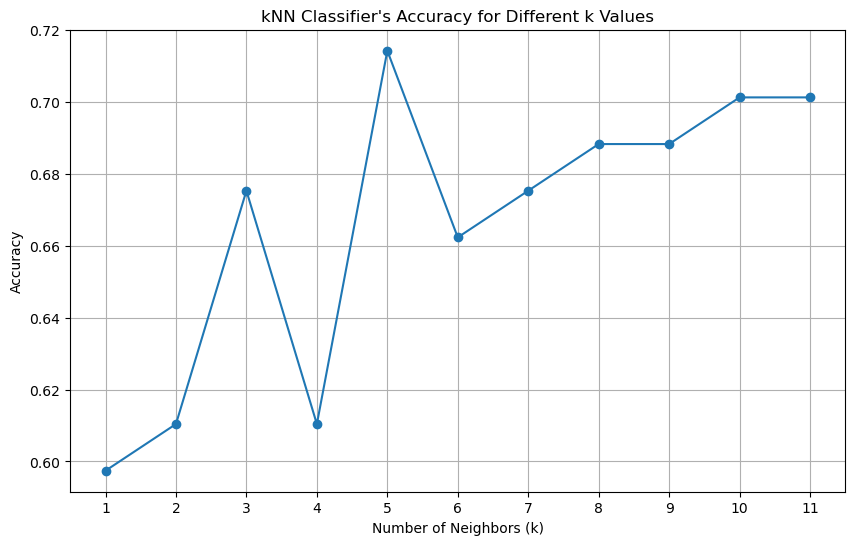

In [104]:
# Initialize a list to store accuracy for each k
accuracy_list = []

# Training kNN for k values from 1 to 11
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)  # Calculate accuracy
    accuracy_list.append(accuracy)  # Store accuracy

# Plotting the accuracy against k values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), accuracy_list, marker='o')
plt.title('kNN Classifier\'s Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 12))
plt.grid()
plt.show()

In [105]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Print results
print("Training data Confusion Matrix:")
print(train_confusion)
print("\nTraining data Classification Report:")
print(train_report)

print("Test data Confusion Matrix:")
print(test_confusion)
print("\nTest data Classification Report:")
print(test_report)

# Calculate and print accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')
#overfitting

Training data Confusion Matrix:
[[ 47  42]
 [ 17 198]]

Training data Classification Report:
              precision    recall  f1-score   support

           N       0.73      0.53      0.61        89
           Y       0.82      0.92      0.87       215

    accuracy                           0.81       304
   macro avg       0.78      0.72      0.74       304
weighted avg       0.80      0.81      0.80       304

Test data Confusion Matrix:
[[ 3 18]
 [ 7 49]]

Test data Classification Report:
              precision    recall  f1-score   support

           N       0.30      0.14      0.19        21
           Y       0.73      0.88      0.80        56

    accuracy                           0.68        77
   macro avg       0.52      0.51      0.50        77
weighted avg       0.61      0.68      0.63        77

Training Accuracy: 0.81
Test Accuracy: 0.68
